In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import scipy.stats

# Analysis of Queueing System

In [2]:
df0 = pd.read_csv('MeanCustomersInQueue0.csv', header= None, names = ['Customers 0'])

In [3]:
df0.head()

,Customers 0
0,1.003915
1,1.026882
2,0.985912
3,1.018647
4,1.003059


In [4]:
df1 = pd.read_csv('MeanCustomersInQueue1.csv', header= None, names = ['Customers 1'])

In [5]:
df = df0.join(df1)

In [6]:
df

,Customers 0,Customers 1
0,1.003915,1.004867
1,1.026882,1.008044
2,0.985912,1.005764
3,1.018647,1.001384
4,1.003059,1.004197
...,...,...
95,1.031028,1.011365
96,0.973511,1.040156
97,1.029933,1.006520
98,1.018353,0.998737


In [7]:
df.corr()

,Customers 0,Customers 1
Customers 0,1.000000,-0.134646
Customers 1,-0.134646,1.000000


In [8]:
corr01 = df['Customers 0'].corr(df['Customers 1'])
corr01

-0.13464629188159039

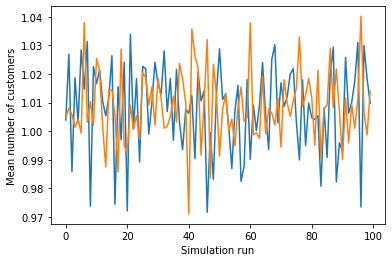

In [9]:
plt.plot(df.index, df['Customers 0'])
plt.plot(df.index, df['Customers 1'])
plt.tight_layout
plt.ylabel('Mean number of customers')
plt.xlabel('Simulation run')
plt.savefig('AntitheticResults.png')

In [10]:
mean0 = df['Customers 0'].mean()
mean1 = df['Customers 1'].mean()

In [11]:
mean0

1.0080436176961853

In [12]:
mean1

1.008705047789194

In [13]:
total = np.append(df['Customers 0'].to_numpy(), df['Customers 1'].to_numpy())

In [14]:
total.std()/math.sqrt(200)

0.0009733434947762132

In [15]:
df['Customers 1'].std()

0.012336435759775383

In [16]:
sd0 = df['Customers 0'].std()/math.sqrt(len(df['Customers 0']))
sd1 = df['Customers 1'].std()/math.sqrt(len(df['Customers 1']))

In [17]:
sd0

0.0015178217641425836

In [18]:
sd1

0.0012336435759775382

In [19]:
crit_t01 = scipy.stats.t.ppf(0.975, 99)
crit_t01

1.9842169515086827

In [20]:
print(f'[{mean0-crit_t01*sd0}, {mean0+crit_t01*sd0}]')

[1.0050319300224049, 1.0110553053699658]


In [21]:
print(f'[{mean1-crit_t01*sd1}, {mean1+crit_t01*sd1}]')

[1.0062572312936195, 1.0111528642847682]


In [22]:
mean = (mean0 + mean1)/2
mean

1.0083743327426897

In [23]:
sd = math.sqrt(1/4 *(sd0**2+sd1**2))
sd

0.0009779646440766089

In [24]:
sd0**2

2.3037829077049044e-06

In [25]:
sd1**2

1.521876472550648e-06

In [26]:
df['Customers 0'].std()*df['Customers 1'].std()*corr01

-2.5211859314544394e-05

In [27]:
cov = df.cov()

In [28]:
cov01 = cov.iloc[1,0]
cov01

-2.52118593145444e-05

In [29]:
df['Customers 0'].std()

0.015178217641425835

In [30]:
1/4*(df['Customers 0'].var()+df['Customers 1'].var()+2*cov01)

8.303555484911661e-05

In [31]:
sd = math.sqrt(1/4*(df['Customers 0'].var()+df['Customers 1'].var()+2*cov01))
sd

0.00911238469606703

In [32]:
sd_mean = sd/math.sqrt(200)
sd_mean

0.0006443429011369513

In [33]:
crit_t = scipy.stats.t.ppf(0.975, 199)
crit_t

1.971956544249395

In [34]:
lb = mean - crit_t*sd_mean

In [35]:
ub = mean + crit_t*sd_mean

In [36]:
print(f'[{lb}, {ub}]')

[1.007103716542052, 1.0096449489433275]


In [37]:
measurements = pd.read_csv('Measurements.csv', header= None, names = ['Customers'])

In [38]:
frequency = np.unique(measurements['Customers'], return_counts= True)

In [39]:
rel_freq = frequency[1]/sum(frequency[1])

In [40]:
rel_freq

array([4.11624072e-01, 3.43084196e-01, 1.43224970e-01, 5.96470434e-02,
       2.47697904e-02, 1.02921761e-02, 4.28479172e-03, 1.76177426e-03,
       7.43051732e-04, 3.30245214e-04, 1.45531789e-04, 5.59737651e-05,
       2.37888502e-05, 6.99672064e-06, 2.79868825e-06, 6.99672064e-07,
       6.99672064e-07, 1.39934413e-06])

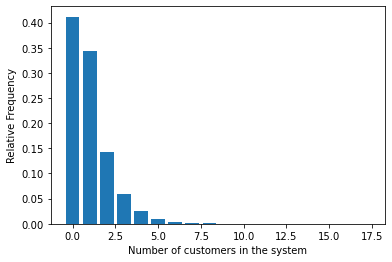

In [41]:
plt.bar(frequency[0], rel_freq)
#plt.xlim([0,30])
#plt.ylim([0,42000])
plt.xlabel('Number of customers in the system')
plt.ylabel('Relative Frequency')
plt.tight_layout
plt.savefig('RelFreq.png')

In [46]:
lam = 1.2
mu = 1.0
c = 2

In [48]:
rho = lam/(mu*c)
rho

0.6